# week 6
## pooling and dorpout in CNNs
### part2: Apply dropout layers for regulartion

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0     # Normalize to [0,1]
x_train = x_train.reshape(-1, 28, 28, 1)     # Reshape for CNN
x_test = x_test.reshape(-1, 28, 28, 1)

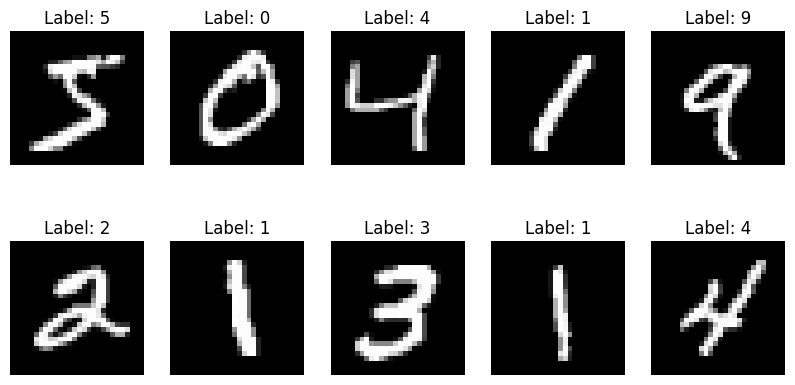

In [3]:
# Display some images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
# Define CNN model with dropout for regularization
def create_model_with_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),     # Dropout layer with 50% dropout rate
        layers.Dense(10, activation='softmax')
        ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Create and train the model
model_with_dropout = create_model_with_dropout()
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2003 - accuracy: 0.9384 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0622 - accuracy: 0.9822 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0264 - val_accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0267 - val_accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0252 - val_accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0288 - val_ac

In [6]:
# Evaluate the model
test_loss, test_acc = model_with_dropout.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy with dropout: {test_acc:.4f}")

313/313 - 0s - loss: 0.0461 - accuracy: 0.9894 - 487ms/epoch - 2ms/step
Test accuracy with dropout: 0.9894


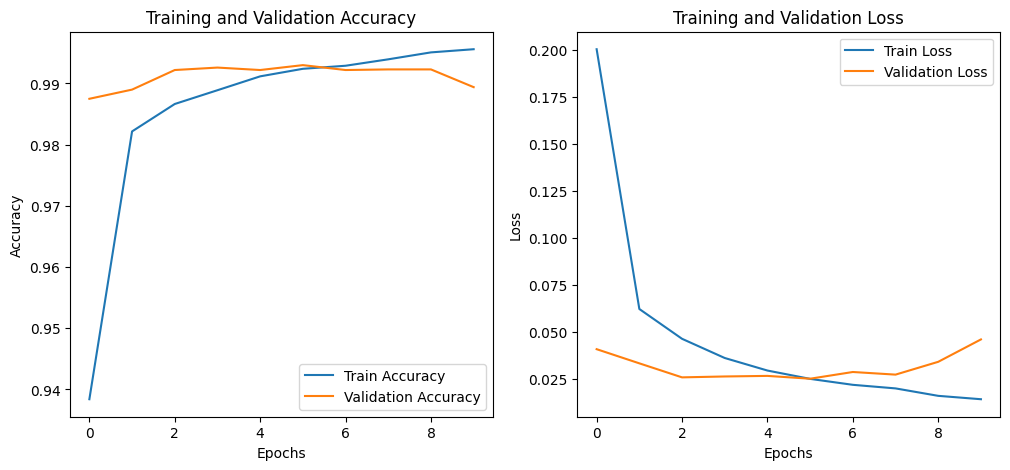

In [7]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Train Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
